In [133]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

#sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Fetch data and write local copy of df

In [134]:
def fetch(dataset_url: str) -> pd.DataFrame:
    print(dataset_url)
    # df = pd.read_csv(dataset_url, compression='gzip')
    df = pd.read_parquet(dataset_url)
    return df

In [135]:
def save_to_file(path):
    path = Path(f"{path}/trips_data_{months[0]:02}-{years[0]}_{months[-1]:02}-{years[-1]}.parquet")
    if not path.parent.is_dir():
        path.parent.mkdir(parents=True)
    path = Path(path).as_posix()
    df.to_parquet(path, compression="gzip")
    print(f"data saved to file: {path}")

In [136]:
colors = ["yellow"]
months = [1,2]
years = [2022]

In [137]:
df = pd.DataFrame()
for color in colors:
    for month in months:
        for year in years:
            url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{color}_tripdata_{year}-{month:02}.parquet"
    
            df = pd.concat([df, fetch(url)], ignore_index=True)
    
save_to_file("data")   
    

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet
data saved to file: data/trips_data_01-2022_02-2022.parquet


## Q1

In [139]:
np.shape(df)[1]

19

## Q2

In [141]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [142]:
df_jan = df.loc[df.tpep_pickup_datetime.dt.month == 1]
df_feb = df.loc[df.tpep_pickup_datetime.dt.month == 2]

In [143]:
df_jan.duration.std()

46.435820115105685

## Q3

/var/folders/ky/q3hm5s6d2zvc5yqjvr_3q9tm0000gn/T/ipykernel_68265/561556350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_jan.duration, label='duration')


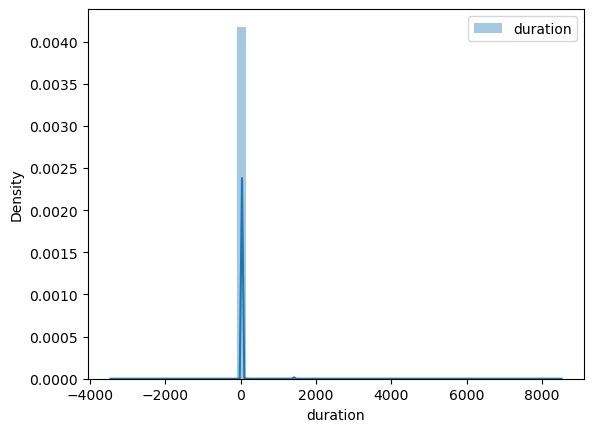

In [145]:
sns.distplot(df_jan.duration, label='duration')
plt.legend()

In [146]:
before = np.shape(df_jan)

In [147]:
# drop outliers

df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

/var/folders/ky/q3hm5s6d2zvc5yqjvr_3q9tm0000gn/T/ipykernel_68265/1350875215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_jan.duration, label='duration')


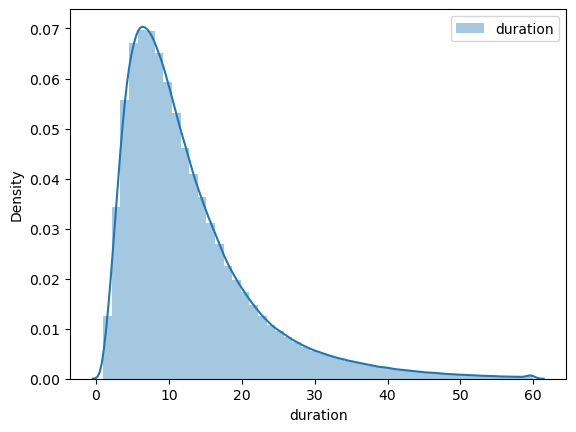

In [148]:
sns.distplot(df_jan.duration, label='duration')
plt.legend()


In [149]:
after = np.shape(df_jan)

In [150]:
percent_change = after[0]/before[0]


print(f"Percent of records left after dropping outliers: {(percent_change)*100:.10f}%")

Percent of records left after dropping outliers: 98.2755079926%


## Q4

In [153]:
categorical = ['PULocationID', 'DOLocationID']
dict_features = df_jan[categorical].astype(str).to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(dict_features)

In [154]:
X_train

<2421424x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842848 stored elements in Compressed Sparse Row format>

## Q5

In [155]:
target = 'duration'
y_train = df_jan[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [156]:
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

6.98623984405811

## Q6

In [167]:
df_feb['duration'] = (df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime).dt.total_seconds() / 60

df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]


/var/folders/ky/q3hm5s6d2zvc5yqjvr_3q9tm0000gn/T/ipykernel_68265/4076143515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb['duration'] = (df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime).dt.total_seconds() / 60


In [168]:
valid_dicts = df_feb[categorical].astype("str").to_dict(orient="records")
X_valid = dv.transform(valid_dicts)

In [169]:
X_valid

<2918139x515 sparse matrix of type '<class 'numpy.float64'>'
	with 5836272 stored elements in Compressed Sparse Row format>

In [170]:
y_valid = df_feb["duration"]

In [171]:
y_pred = lr.predict(X_valid)
mean_squared_error(y_valid, y_pred, squared=False)

7.786410791128365